# Import 

In [2]:
import warnings
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Acquire

In [3]:
#create list of desired column names
colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']

#import data from existing text 
df = pd.read_csv('anonymized-curriculum-access.txt',
                sep='\s',
                header=None,
                names=colnames,
                usecols=[0,2,3,4,5])

#view head of file
df.head()

/var/folders/x7/9w9mh0fd73zg4jr8l_9v9h840000gn/T/ipykernel_81528/1501380910.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('anonymized-curriculum-access.txt',


,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


# Prepare

In [4]:
#convert date column to datetime and set as index
df.date = pd.to_datetime(df.date)
df = df.set_index(df.date)

#create series that is count pages viewed and view head of that data
pages = df['endpoint'].resample('d').count()
pages.head()

date
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: endpoint, dtype: int64

<AxesSubplot:xlabel='date'>

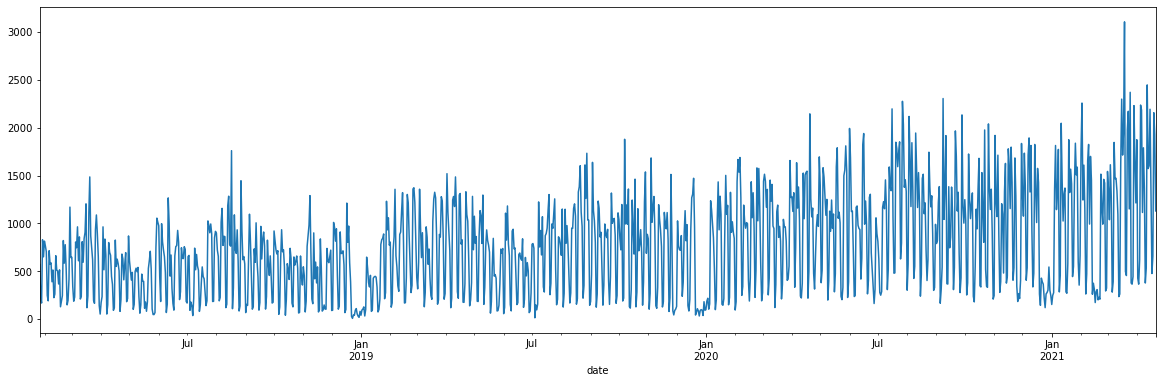

In [5]:
#plot series to view data over time
plt.figure(figsize=(20,6))
pages.plot()

# Explore
## Expotential Moving Average (EMA)
* using pandas `.ewm()`

In [6]:
#calculate 7 day EMA 
ema_7d = pages.ewm(span=7).mean()
ema_7d.head()

date
2018-01-26    572.000000
2018-01-27    376.571429
2018-01-28    287.243243
2018-01-29    485.737143
2018-01-30    540.235595
Freq: D, Name: endpoint, dtype: float64

In [7]:
# calculate 14 day EMA
ema_14d = pages.ewm(span=14).mean()
ema_14d.head()

date
2018-01-26    572.000000
2018-01-27    388.785714
2018-01-28    305.208829
2018-01-29    465.757252
2018-01-30    514.347700
Freq: D, Name: endpoint, dtype: float64

In [8]:
# calculate 30 day EMA
ema_30d = pages.ewm(span=30).mean()
ema_30d.head()

date
2018-01-26    572.000000
2018-01-27    395.300000
2018-01-28    315.139578
2018-01-29    457.002386
2018-01-30    501.369064
Freq: D, Name: endpoint, dtype: float64

In [9]:
# calculate 90 day EMA
ema_90d = pages.ewm(span=90).mean()
ema_90d.head()

date
2018-01-26    572.000000
2018-01-27    399.100000
2018-01-28    321.030081
2018-01-29    452.545042
2018-01-30    494.228442
Freq: D, Name: endpoint, dtype: float64

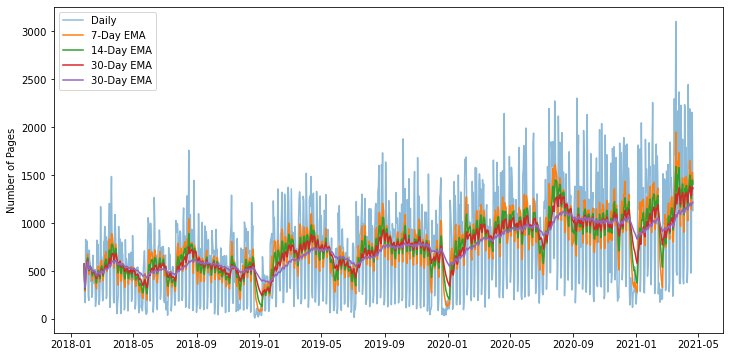

In [10]:
#plot the various EMA series
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(pages.index, pages, label='Daily', alpha=.5)

ax.plot(pages.index, ema_7d, label = '7-Day EMA')
ax.plot(pages.index, ema_14d, label = '14-Day EMA')
ax.plot(pages.index, ema_30d, label = '30-Day EMA')
ax.plot(pages.index, ema_90d, label = '30-Day EMA')

ax.legend(loc='best')
ax.set_ylabel('Number of Pages')

plt.show()

## Bollinger Bands and %b
* Volitility indicator
* Consists of Upper Band (UB), Lower Band (LB) and Midband

In [11]:
#set the window span
span = 30

#compute midbad
midband = pages.ewm(span=span).mean()

#show the .head()
midband.head()

date
2018-01-26    572.000000
2018-01-27    395.300000
2018-01-28    315.139578
2018-01-29    457.002386
2018-01-30    501.369064
Freq: D, Name: endpoint, dtype: float64

In [12]:
#compute expontential stdev
stdev = pages.ewm(span=span).std()
stdev.head()

date
2018-01-26           NaN
2018-01-27    241.830519
2018-01-28    213.878138
2018-01-29    316.467837
2018-01-30    284.479727
Freq: D, Name: endpoint, dtype: float64

In [13]:
#compute upper and lower bands
ub = midband + stdev*3
lb = midband - stdev*3

In [14]:
ub, lb

(date
 2018-01-26            NaN
 2018-01-27    1120.791557
 2018-01-28     956.773991
 2018-01-29    1406.405897
 2018-01-30    1354.808245
                  ...     
 2021-04-17    3545.216722
 2021-04-18    3486.733695
 2021-04-19    3569.147958
 2021-04-20    3579.231798
 2021-04-21    3499.094360
 Freq: D, Name: endpoint, Length: 1182, dtype: float64,
 date
 2018-01-26           NaN
 2018-01-27   -330.191557
 2018-01-28   -326.494835
 2018-01-29   -492.401124
 2018-01-30   -352.070116
                  ...    
 2021-04-17   -894.858492
 2021-04-18   -922.334061
 2021-04-19   -891.999913
 2021-04-20   -825.770723
 2021-04-21   -777.340451
 Freq: D, Name: endpoint, Length: 1182, dtype: float64)

In [15]:
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()

,ub,lb
date,,
2018-01-26,NaN,NaN
2018-01-27,1120.791557,-330.191557
2018-01-28,956.773991,-326.494835
2018-01-29,1406.405897,-492.401124
2018-01-30,1354.808245,-352.070116


In [16]:
#create dframe to whole created values
my_df = pd.concat([pages, midband, bb], axis=1)
my_df.columns = ['pages', 'midband', 'ub', 'lb']
my_df.head()

,pages,midband,ub,lb
date,,,,
2018-01-26,572,572.000000,NaN,NaN
2018-01-27,230,395.300000,1120.791557,-330.191557
2018-01-28,170,315.139578,956.773991,-326.494835
2018-01-29,830,457.002386,1406.405897,-492.401124
2018-01-30,652,501.369064,1354.808245,-352.070116


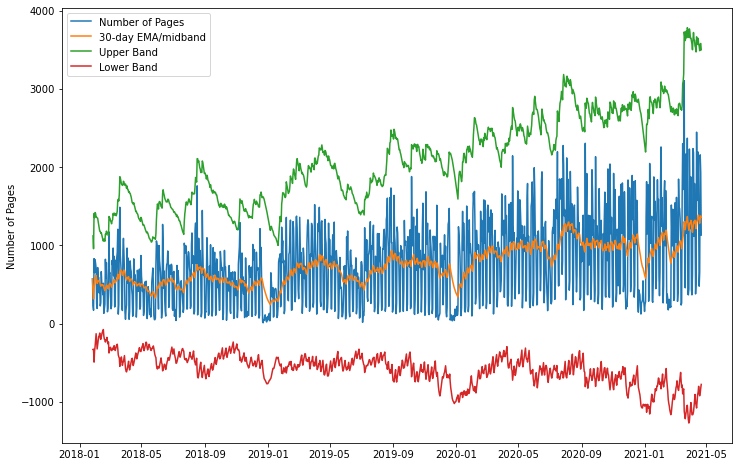

In [17]:
#plot bands
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.pages, label='Number of Pages')

ax.plot(my_df.index, my_df.midband, label='30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label='Upper Band')
ax.plot(my_df.index, my_df.lb, label='Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of Pages')

plt.show()

In [21]:
#get the last measure of gb
last_measure = my_df.iloc[-1].pages
last_measure

1131.0

In [20]:
#get the lower band value on the last date
last_lb = my_df.iloc[-1].lb
last_lb

-777.340451135389

In [22]:
#get the lower band value on the last date
last_ub = my_df.iloc[-1].ub
last_ub

3499.0943598250406

In [23]:
#compute %b
last_pct_b = (last_measure - last_lb)/(last_ub - last_lb)

print('%b for last datapoint: ', round(last_pct_b, 2))

%b for last datapoint:  0.45


In [24]:
my_df.tail(3)

,pages,midband,ub,lb
date,,,,
2021-04-19,2156,1338.574023,3569.147958,-891.999913
2021-04-20,1930,1376.730537,3579.231798,-825.770723
2021-04-21,1131,1360.876954,3499.094360,-777.340451


In [27]:
#compute for each point in time
my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub']- my_df['lb'])

my_df.head()

,pages,midband,ub,lb,pct_b
date,,,,,
2018-01-26,572,572.000000,NaN,NaN,NaN
2018-01-27,230,395.300000,1120.791557,-330.191557,0.386077
2018-01-28,170,315.139578,956.773991,-326.494835,0.386899
2018-01-29,830,457.002386,1406.405897,-492.401124,0.696438
2018-01-30,652,501.369064,1354.808245,-352.070116,0.588249


In [28]:
#check for anomlaies 
my_df[my_df['pct_b'] > 1]

,pages,midband,ub,lb,pct_b
date,,,,,


## Creating Functions 
* Pull everything together

### acquire

In [40]:
def acquire(file_name, column_names):
    return pd.read_csv(file_name,
                        sep='\s',
                        header=None,
                        names=column_names,
                        usecols=[0,2,3,4,5])

### prep with user


In [30]:
def prep(df, user):
    df = df[df.user_id == user]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages = df['endpoint'].resample('d').count()
    return pages

### compute features
* compute midband
* compute standard deviation
* compute upper & lower band
* create df with metrics
* compute %b  
* add user_id to dataframe


In [31]:
def compute_pct_b(pages, span, weight, user):
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.concat([ub, lb], axis=1)
    my_df = pd.concat([pages, midband, bb], axis=1)
    my_df.columns = ['pages', 'midband', 'ub', 'lb']
    my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

### Plot


In [32]:
def plt_bands(my_df, user):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages, label='Number of pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label='EMA/Midband')
    ax.plot(my_df.index, my_df.ub, label='Upper Band')
    ax.plot(my_df.index, my_df.lb, label='Lower Band')
    ax

### search for anomalies

In [43]:
def find_anomalies(df, user, span, weight):
    pages = prep(df, user)
    my_df = compute_pct_b(pages, span, weight, user)
    #plt_bands(my_df, user)
    return my_df[my_df.pct_b > 1]

# Testing 
* test created functions

## Acquire

In [41]:
file_name = 'anonymized-curriculum-access.txt'
column_names = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
df = acquire(file_name, column_names)
df.head()

/var/folders/x7/9w9mh0fd73zg4jr8l_9v9h840000gn/T/ipykernel_81528/931910856.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return pd.read_csv(file_name,


,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


## Test on single user


In [45]:
user = 1
span = 30 
weight = 6
user_df = find_anomalies(df, user, span, weight)

anomalies = pd.DataFrame()
anomalies = pd.concat([anomalies, user_df], axis=0)
anomalies

/var/folders/x7/9w9mh0fd73zg4jr8l_9v9h840000gn/T/ipykernel_81528/2962999308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date = pd.to_datetime(df.date)


,pages,midband,ub,lb,pct_b,user_id
date,,,,,,


## Loop through all users

In [46]:
span = 30
weight = 3.5

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

/var/folders/x7/9w9mh0fd73zg4jr8l_9v9h840000gn/T/ipykernel_81528/2962999308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date = pd.to_datetime(df.date)
/var/folders/x7/9w9mh0fd73zg4jr8l_9v9h840000gn/T/ipykernel_81528/2962999308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date = pd.to_datetime(df.date)
/var/folders/x7/9w9mh0fd73zg4jr8l_9v9h840000gn/T/ipykernel_81528/2962999308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

## Explore Anomalies


In [48]:
anomalies.pages.value_counts(sort=False).head(50)

44      4
101     2
9      42
4      76
2      36
38      4
74      4
17     22
5      58
6      53
27     13
12     29
15     22
8      52
13     33
34     13
7      48
1      48
3      71
29      7
25     11
23     12
24     14
16     29
11     34
10     34
32     12
31      2
55      2
28     12
21     15
18     23
57      2
22     11
72      2
20     18
33      9
19     22
59      3
26      9
46      3
14     21
73      2
60      1
36      8
47      2
30     11
65      1
89      1
43      4
Name: pages, dtype: int64

In [49]:
anomalies[anomalies.pages==272]

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-03-03,272,24.721632,266.780128,-217.336864,1.010782,341


In [50]:
anomalies[anomalies.user_id==341]

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-03-03,272,24.721632,266.780128,-217.336864,1.010782,341
2020-02-18,3,0.193548,2.817185,-2.430088,1.034840,341
2020-04-21,109,7.250725,102.413277,-87.911826,1.034608,341
2021-02-09,10,0.659630,9.508602,-8.189342,1.027766,341


In [51]:
df[df.user_id==341]

,date,endpoint,user_id,cohort_id,source_ip
181808,2019-01-22,/,341,29.0,97.105.19.58
181826,2019-01-22,toc,341,29.0,97.105.19.58
181840,2019-01-22,html-css,341,29.0,97.105.19.58
181862,2019-01-22,html-css/introduction,341,29.0,97.105.19.58
181870,2019-01-22,html-css/elements,341,29.0,97.105.19.58
...,...,...,...,...,...
817183,2021-02-09,search/search_index.json,341,29.0,172.124.70.146
817184,2021-02-09,appendix/further-reading/spring/seeder,341,29.0,172.124.70.146
817268,2021-02-10,appendix/code-standards/mysql,341,29.0,172.124.70.146
817269,2021-02-10,appendix/further-reading/spring/pagination,341,29.0,172.124.70.146


### Takeaways
* User 341 has supsicious activity. Suggest further investigation